# Tier 2. Module 2: Numerical Programming in Python

## Topic 3 - Vector operations in n-dimensional spaces
## Homework

Using vector operations to process word vectors. This approach may be useful in natural language processing (NLP) tasks.

This will help to consolidate the following skills:
* Vector, scalar product.
* Application of `Pandas`, `Numpy` packages.

### Task

For this task, use a [file](https://drive.google.com/file/d/1281E0CDneuKdflWFBUvuyUzujpdGVImz/view?usp=sharing) with an NLP model.

#### 1. Define a DataFrame with 3D word vectors.

##### 1.1 - Load the word embeddings model using the file that contains the NLP model.

In [1]:
import pickle
import numpy as np
import pandas as pd

model_path = "./src/word_embeddings_subset.p"
with open(model_path, "rb") as fd:
    word_embeddings = pickle.load(fd)

print("Number of embedded words:", len(word_embeddings))
print("Source type:", type(word_embeddings))
print("List of embedded words:", list(word_embeddings.keys()))
print("Shape of the matrix with embedding vectors:", np.shape(list(word_embeddings.values())))
word_embeddings["city"]

Number of embedded words: 243
Source type: <class 'dict'>
List of embedded words: ['country', 'city', 'China', 'Iraq', 'oil', 'town', 'Canada', 'London', 'England', 'Australia', 'Japan', 'Pakistan', 'Iran', 'gas', 'happy', 'Russia', 'Afghanistan', 'France', 'Germany', 'Georgia', 'Baghdad', 'village', 'Spain', 'Italy', 'Beijing', 'Jordan', 'Paris', 'Ireland', 'Turkey', 'Egypt', 'Lebanon', 'Taiwan', 'Tokyo', 'Nigeria', 'Vietnam', 'Moscow', 'Greece', 'Indonesia', 'sad', 'Syria', 'Thailand', 'Libya', 'Zimbabwe', 'Cuba', 'Ottawa', 'Tehran', 'Sudan', 'Kenya', 'Philippines', 'Sweden', 'Poland', 'Ukraine', 'Rome', 'Venezuela', 'Switzerland', 'Berlin', 'Bangladesh', 'Portugal', 'Ghana', 'Athens', 'king', 'Madrid', 'Somalia', 'Dublin', 'Qatar', 'Chile', 'Islamabad', 'Bahrain', 'Nepal', 'Norway', 'Serbia', 'Kabul', 'continent', 'Brussels', 'Belgium', 'Uganda', 'petroleum', 'Cairo', 'Denmark', 'Austria', 'Jamaica', 'Georgetown', 'Bangkok', 'Finland', 'Peru', 'Romania', 'Bulgaria', 'Hungary', 'Vien

array([-1.00708008e-02,  5.73730469e-02,  1.83593750e-01, -4.00390625e-02,
       -2.97851562e-02, -7.91015625e-02,  7.17773438e-02,  1.33056641e-02,
       -1.43554688e-01,  1.12915039e-02, -3.27148438e-02,  7.76367188e-02,
        1.54296875e-01, -6.39648438e-02, -1.08886719e-01, -1.90429688e-02,
       -6.93359375e-02, -5.34667969e-02, -8.78906250e-02,  8.11767578e-03,
       -1.69921875e-01, -8.15429688e-02, -2.68554688e-03, -1.05957031e-01,
        5.93261719e-02, -1.58203125e-01, -3.07617188e-02,  1.65039062e-01,
       -1.97265625e-01, -1.51367188e-02,  1.00097656e-01, -9.66796875e-02,
       -7.22656250e-02,  2.32421875e-01, -4.12597656e-02, -1.81640625e-01,
        2.23388672e-02,  4.68750000e-02,  1.07910156e-01,  2.49023438e-02,
       -1.18652344e-01,  1.19628906e-01,  1.85546875e-01,  5.44433594e-02,
       -2.04101562e-01,  1.29882812e-01, -4.10156250e-02, -7.61718750e-02,
       -2.41210938e-01,  2.61718750e-01,  5.24902344e-02,  3.39355469e-02,
       -3.58886719e-02, -

##### 1.2 - Extract 3D vectors for all words from this model.

In [2]:
from sklearn.decomposition import PCA

all_words = list(word_embeddings.keys())

original_vectors = np.array([word_embeddings[word] for word in all_words])
print("Shape of the matrix with original embedding vectors:", original_vectors.shape)

pca = PCA(n_components=3)
vectors_3d = pca.fit_transform(original_vectors)
print(
    "Shape of the matrix with 3D embedding vectors after PCA transformation:",
    vectors_3d.shape,
)
print("Example of the 3D vector:", vectors_3d[0])

Shape of the matrix with original embedding vectors: (243, 300)
Shape of the matrix with 3D embedding vectors after PCA transformation: (243, 3)
Example of the 3D vector: [ 0.7460359  -0.3879691  -0.48269323]


Graphic representation of the first 10 vectors.

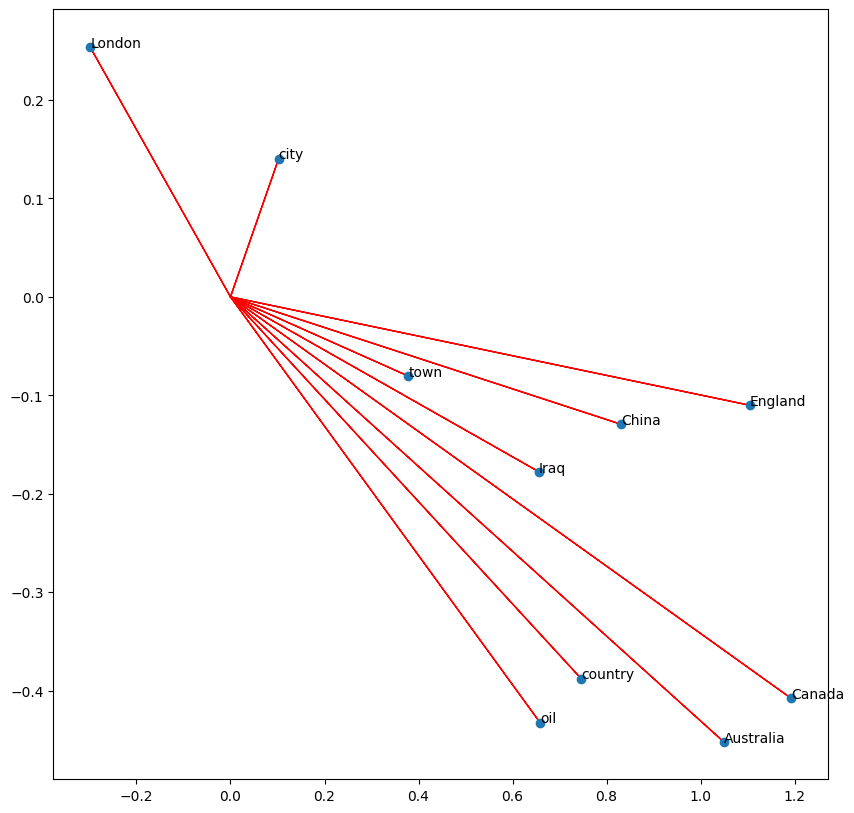

In [3]:
import matplotlib.pyplot as plt

vectors_number = 10

fig, ax = plt.subplots(figsize = (10, 10))

# Print an arrow for each word
for word in vectors_3d[0:vectors_number]:
    ax.arrow(0, 0, word[0], word[1], head_width=0.005, head_length=0.005, fc='r', ec='r', width = 1e-5)

# Plot a dot for each word
ax.scatter(vectors_3d[:vectors_number, 0], vectors_3d[:vectors_number, 1])

# Add the word label over each dot in the scatter plot
for i in range(0, vectors_number):
    ax.annotate(all_words[i], (vectors_3d[i, 0], vectors_3d[i, 1]))
plt.show()

Note:
Interesting results, in 2D representation "Iraq" is closer to "city" than to "oil" and "country", this means that 2 dimensions is too much of a simplification to represent the relationships between words.

##### 1.3 - Create a DataFrame that will contain information about words and their 3D vectors.

In [4]:
df_3d = pd.DataFrame(vectors_3d, index=all_words, columns=["x", "y", "z"])
df_3d.head()

,x,y,z
country,0.746036,-0.387969,-0.482693
city,0.102493,0.140384,-1.189890
China,0.831054,-0.129504,-0.312601
Iraq,0.656336,-0.177794,-0.338387
oil,0.658342,-0.432468,-0.621216


In [6]:
import plotly.express as px

fig = px.scatter_3d(
    df_3d[:vectors_number], x="x", y="y", z="z", color=df_3d.index[:vectors_number]
)
fig.show()

Note:
In 3D representation, "Iraq" is much closer to "country" and "oil" than to "city".

#### 2. Define functions for finding the nearest word.

##### 2.1 - Write a function that takes a 3D vector and finds the closest word in the model `word_embeddings_subset`.

In [34]:
def find_closest_word(vector: np.array, df: pd.DataFrame) -> str:
    # Calculate the vector difference from each word to the input vector
    diff = df.values - vector
    # Get the squared L2 norm of each difference vector.
    # It means the squared euclidean distance from each word to the input vector
    delta = np.sum(diff**2, axis=1)
    # Find the index of the minimun distance in the array
    i = np.argmin(delta)
    # Return the row name for this item
    return df.iloc[i].name


def find_closest_words(vector: np.array, df: pd.DataFrame, n: int = 1) -> list:
    # df.apply applies a lambda function on horizontal axis to df, lambda takes each row from df and
    # np.linalg.norm calculates the Euclidean distance between the given vector and the current row vector
    distances = df.apply(lambda row: np.linalg.norm(vector - row.values), axis=1)
    closest_indices = np.argsort(distances)[:n]
    closest_words = df.index[closest_indices]
    return list(closest_words)


# Test conditions
example_word = "city"
example_vector = df_3d.loc[example_word].values
closest_words = find_closest_words(example_vector, df_3d, 5)
print(f"Closest words to the vector of '{example_word}': {closest_words}")

Closest word to the vector of 'city': ['city', 'Ottawa', 'town', 'Nassau', 'London']


##### 2.2 - Use this function for a few examples and make sure the results are correct.

In [45]:
find_closest_words((df_3d.loc["Iraq"] - df_3d.loc["oil"] + df_3d.loc["country"]), df_3d, 3)

['China', 'Iraq', 'Afghanistan']

In [49]:
find_closest_words((df_3d.loc["Paris"] - df_3d.loc["joyful"] + df_3d.loc["sad"]), df_3d, 3)

['London', 'Paris', 'Montevideo']

In [52]:
doc = "France Afghanistan"
vdoc = [df_3d.loc[x] for x in doc.split(" ")]
doc2vec = np.sum(vdoc, axis = 0)

find_closest_words(doc2vec, df_3d, 3)

['Portugal', 'Norway', 'Ireland']

#### 3. Calculate the vector product to find the orthogonal word.

##### 3.1 - Choose several random pairs of words.

In [59]:
import random


def choose_random_pair_of_words(df: pd.DataFrame = df_3d) -> list:
    return random.sample(list(df.index), 2)

##### 3.2 - Calculate the vector product for each pair of words and use the function written earlier to find the closest word.

In [60]:
def vector_product(pair_of_words: list, df: pd.DataFrame = df_3d) -> np.array:
    vec_1 = df.loc[pair_of_words[0]].values
    vec_2 = df.loc[pair_of_words[1]].values
    return np.cross(vec_1, vec_2)

##### 3.3 - Analyze the results and try to interpret them.

In [65]:
def make_ortogonals(k: int = 5) -> None:
    for _ in range(k):
        random_words = choose_random_pair_of_words()
        print(f"Random pairs of words: {random_words}")
        ortogonal_word_vector = vector_product(random_words)
        ortogonal_words = find_closest_words(ortogonal_word_vector, df_3d, 3)
        print("3 closest ortogonaal words:", ortogonal_words)
        print()


make_ortogonals()

Random pairs of words: ['Nuuk', 'Niger']
3 closest ortogonaal words: ['Tehran', 'Valletta', 'Astana']

Random pairs of words: ['Tallinn', 'Damascus']
3 closest ortogonaal words: ['Luanda', 'Asmara', 'Bamako']

Random pairs of words: ['Qatar', 'Gabon']
3 closest ortogonaal words: ['Belmopan', 'Roseau', 'Doha']

Random pairs of words: ['Minsk', 'Albania']
3 closest ortogonaal words: ['Berlin', 'Dublin', 'Athens']

Random pairs of words: ['Jamaica', 'Liberia']
3 closest ortogonaal words: ['Apia', 'Suva', 'Tegucigalpa']



##### Conclusion:
In the context of word embeddings, orthogonal vectors represent words that are semantically unrelated or independent in the embedding space, because two vectors are orthogonal if their scalar product is zero, so that means they don't reinforce each other.
* ['Nuuk', 'Niger'] -> ['Tehran', 'Valletta', 'Astana'] - all these places are very diverse in location and culture;
* ['Tallinn', 'Damascus'] -> ['Luanda', 'Asmara', 'Bamako'] - embedding space groups the African capitals in a way that makes them orthogonal (unrelevant) to the Europe and Middle East.
* ['Qatar', 'Gabon'] -> ['Belmopan', 'Roseau', 'Doha'] - small and not prominent cities are orthogonal to countries in the  embedding space.
* ['Minsk', 'Albania'] -> ['Berlin', 'Dublin', 'Athens'] - the orthogonal vector aligns with well-known European capitals and shows that they are irrelevant to the Eastern Europe.
* ['Jamaica', 'Liberia'] -> ['Apia', 'Suva', 'Tegucigalpa'] - this might indicate a pattern where island or less central locations are orthogonal to more continental or central ones.

#### 4. Write functions for determining the angle between words.

#### 4.1 - Develop a function that calculates the angle between vectors for any two words.

In [67]:
def calculate_angle_between_vectors(vec_1: np.array, vec_2: np.array) -> int:
    dot_product = np.dot(vec_1, vec_2)
    norm_vec_1 = np.linalg.norm(vec_1)
    norm_vec_2 = np.linalg.norm(vec_2)
    cos_theta = dot_product / (norm_vec_1 * norm_vec_2)
    angle = np.arccos(cos_theta)
    return np.degrees(angle)

##### 4.2 - Test this function for different pairs of words.

In [68]:
def make_angles(df: pd.DataFrame = df_3d, k: int = 5) -> None:
    for _ in range(k):
        pair_of_words = choose_random_pair_of_words()
        print(f"Random pairs of words: {pair_of_words}")
        vec_1 = df.loc[pair_of_words[0]].values
        vec_2 = df.loc[pair_of_words[1]].values
        angle = calculate_angle_between_vectors(vec_1, vec_2)
        print("The angle between 2 vectors:", angle)
        print()

##### 4.3 - Consider the obtained results and try to determine their interpretation.

In [70]:
make_angles()

Random pairs of words: ['Jamaica', 'France']
The angle between 2 vectors: 46.179676

Random pairs of words: ['Athens', 'Taiwan']
The angle between 2 vectors: 84.05068

Random pairs of words: ['Portugal', 'Gaborone']
The angle between 2 vectors: 133.58626

Random pairs of words: ['Namibia', 'Bamako']
The angle between 2 vectors: 76.5707

Random pairs of words: ['Ecuador', 'Rabat']
The angle between 2 vectors: 164.12126



##### Conclusion:

The angle between two vectors in the embedded space shows the extent to which words are synonyms, antonyms, or completely unrelated concepts.

* ['Jamaica', 'France'] -> 46° - the angle between these concepts is sharp, but far from 0°, which means that there is a positive connection between them, although not strong;
* ['Athens', 'Taiwan'] -> 84° - the angle is close to 90°, so these are two irrelevant concepts;
* ['Portugal', 'Gaborone'] -> 134° - the angle between these concepts is obtuse, but far from 180°, which means that there is a negativ connection between them, although not strong;
* ['Namibia', 'Bamako'] -> 77° - something between the first and second examples;
* ['Ecuador', 'Rabat'] -> 164° - the angle is close to 180°, which suggests that these are mutually exclusive concepts of antagonists.